# ***Results:***
- Le mappe/immagini hanno dimensioni varie, quella dominante resta 5120x5120
- All train_imgs have at least one map (usually 5, 4, 6)
- All maps_imgs of a train_img match in size
- In tutte le map_dir esclusa la 6 ci sono mappe: **s007_c137 e s007_c145** che non hanno una rispettiva immagine
  - conviene eliminare quelle mappe, dato che non sappiamo a cosa si riferiscono

# Imports & Variables

In [5]:
import os
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt 
import random as rn

maps_paths = ['/content/drive/MyDrive/Maps1_6_T/Maps1_T/', '/content/drive/MyDrive/Maps1_6_T/Maps2_T/', '/content/drive/MyDrive/Maps1_6_T/Maps3_T/', '/content/drive/MyDrive/Maps1_6_T/Maps4_T/', '/content/drive/MyDrive/Maps1_6_T/Maps5_T/', '/content/drive/MyDrive/Maps1_6_T/Maps6_T/']
train_path = '/content/drive/MyDrive/Train Imgs'

def get_map_filename(filename, n):
    # given a filename of a image returns the map filename in the Nth folder
    target_filename = filename[:-4] + f"_MAP{n+1}.png"
    return target_filename


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Rename images
- maps: slideXXX_coreYYY_classimg_nonconvex.png --> sXXX_cYYY_MAPn.png
- train images: slideXXX_coreYYY.jpeg --> sXXX_cYYY.png

In [3]:
# handles maps 
NON_TOCCARE = True

if (NON_TOCCARE == False):
  for i in range(len(maps_paths)):
      for filename in os.listdir(maps_paths[i]):
          if filename.endswith('.png'):
              old_path = os.path.join(maps_paths[i], filename)
              new_filename = f's{filename[5:8]}_c{filename[13:16]}_MAP{i+1}.png' # added _MAP{i+1} can break stuff below
              new_path = os.path.join(maps_paths[i], new_filename)
              os.rename(old_path, new_path)

  # hadles train imgs
  for filename in os.listdir(train_path):
      if filename.endswith('.jpg'):
          old_path = os.path.join(train_path, filename)
          new_filename = f's{filename[5:8]}_c{filename[13:16]}.png'
          new_path = os.path.join(train_path, new_filename)
          os.rename(old_path, new_path)

# Exploring the dataset

## Check maps size in every map_dir

In [6]:
# create list of shapes for every map_N

maps_sizedata = []
for dir in maps_paths:
    print(dir)
    mapn = []
    for filename in os.listdir(dir):
        if filename.endswith('.png'):
            # Load the PNG image using PIL
            image = Image.open(dir+filename)
            # Convert the PIL image to a NumPy array
            array = np.array(image)

            mapn.append(str(array.shape[0])+"x"+str(array.shape[1]))
    maps_sizedata.append(mapn)

# count occurrences for every shape in every mapN

maps_dicts = []

for mapn in maps_sizedata:
    mapn_dict = Counter(mapn)
    maps_dicts.append(mapn_dict)

/content/drive/MyDrive/Maps1_6_T/Maps1_T/
/content/drive/MyDrive/Maps1_6_T/Maps2_T/
/content/drive/MyDrive/Maps1_6_T/Maps3_T/
/content/drive/MyDrive/Maps1_6_T/Maps4_T/
/content/drive/MyDrive/Maps1_6_T/Maps5_T/
/content/drive/MyDrive/Maps1_6_T/Maps6_T/


### Display results

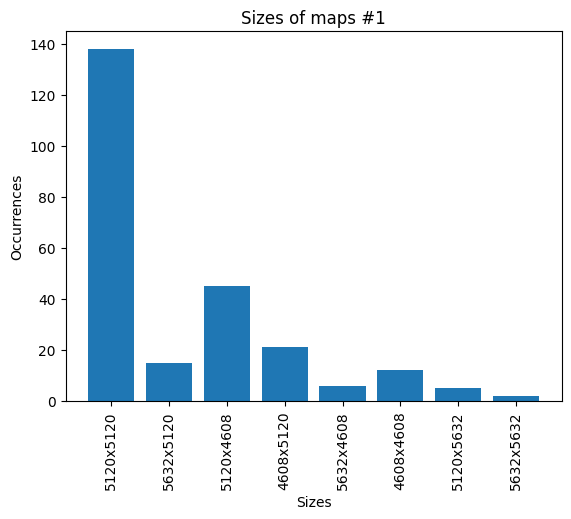

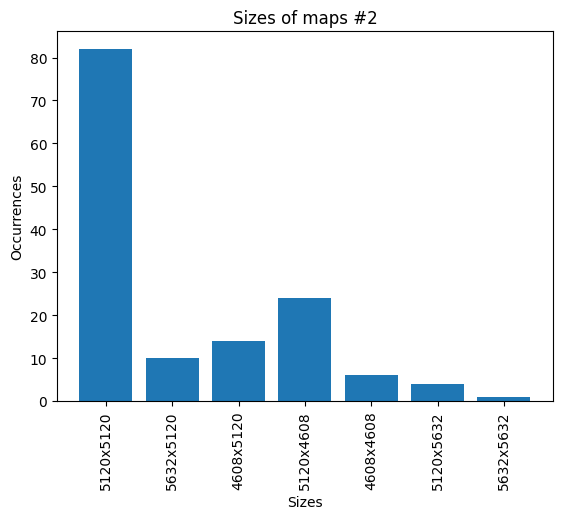

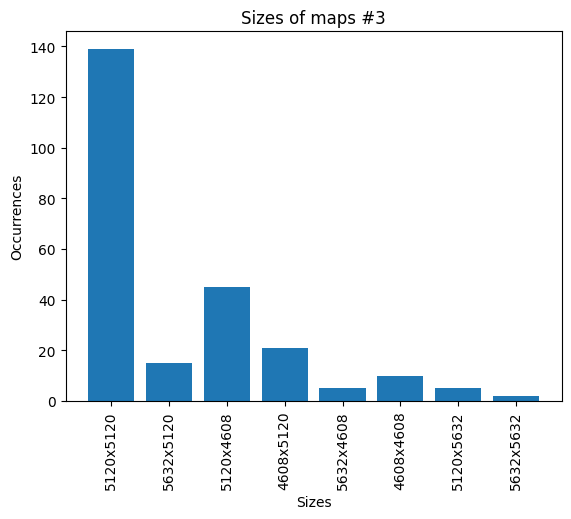

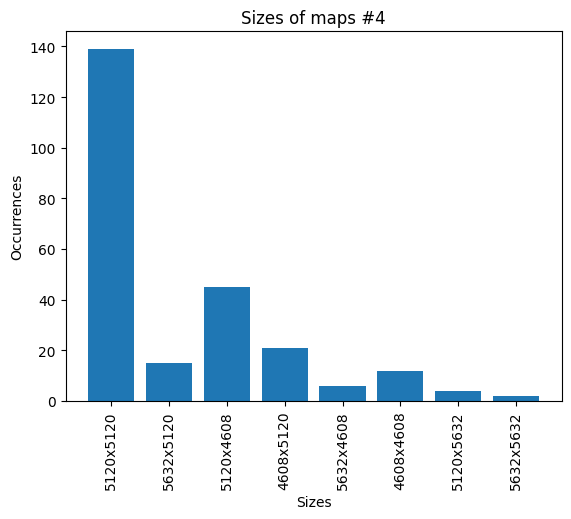

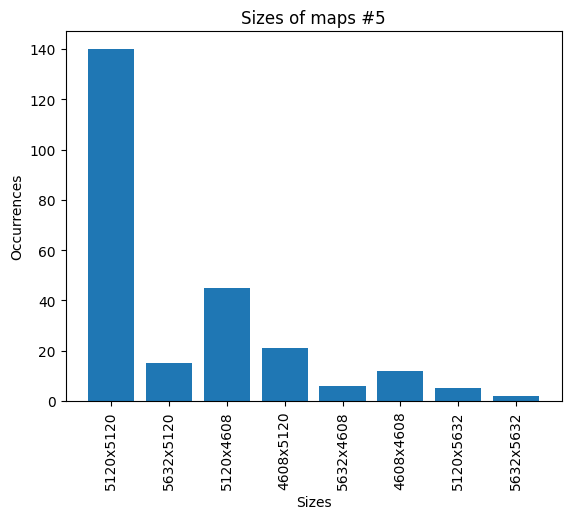

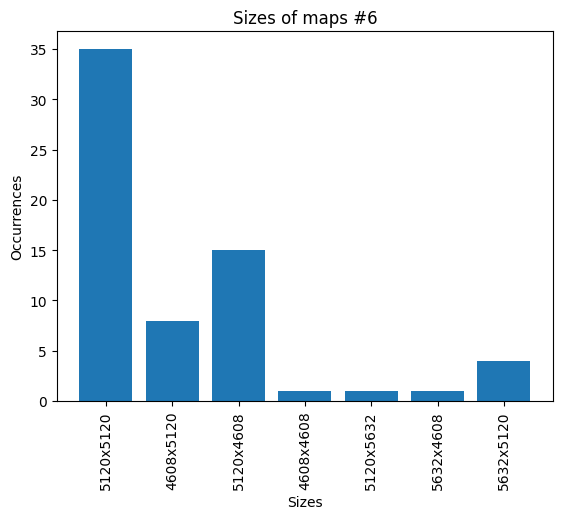

In [7]:
# plot results

for i in range(len(maps_dicts)):
    plt.bar(maps_dicts[i].keys(), maps_dicts[i].values())

    # formatting graph
    title = "Sizes of maps #" + str(i+1)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.ylabel("Occurrences")
    plt.xlabel("Sizes")
    plt.show()
  

## Controllo se nel dataset c'è mismatch di size tra train_img e map corrispettiva

In [ ]:
# for every image in train_img
#     check if image exists in mapN (check if images has at least 1 map)
#     if it does, check if sizes match


for filename in os.listdir(train_path):

    # Load the PNG image using PIL
    train_image = Image.open(os.path.join(train_path, filename))
    # Convert the PIL image to a NumPy array
    train_array = np.array(train_image)

    hasMap = False
    if filename.endswith('.png'):
        for dir in maps_paths:
            if os.path.isfile(os.path.join(dir, filename)):
                hasMap = True

                map_image = Image.open(os.path.join(dir, filename))
                map_array = np.array(map_image)

                if map_array.shape != train_array.shape[0:2]:
                    print(map_array.shape)
                    print(train_array.shape[0:2])
                    print('------')
                    print("Shape mismatch!")

        if not hasMap:
          print(f"{filename} has no maps!")


## What's going on in Map5?!
- there are more maps than train_imgs (246 > 244)
- what if the problem is not only in Map5?
  - there would be map_imgs not linked with train_imgs

### Mappe: **s007_c137 e s007_c145** non hanno la rispettiva immagine!
- conviene escluderle dal dataset

In [ ]:
map5_path = maps_paths[4]

for filename in os.listdir(map5_path):
    if not os.path.isfile(os.path.join(train_path, filename)):
        print(f"{filename} does not appear in train_path")

s007_c137.png does not appear in train_path
s007_c145.png does not appear in train_path


In [ ]:
for dir in maps_paths:
    for filename in os.listdir(dir):
        if not os.path.isfile(os.path.join(train_path, filename)):
          print(f"In Map: {dir} found image: {filename} which do not appear in train_path")

In Map: /content/Maps1_T/Maps1_T/ found image: s007_c137.png which do not appear in train_path
In Map: /content/Maps1_T/Maps1_T/ found image: s007_c145.png which do not appear in train_path
In Map: /content/Maps2_T/Maps2_T/ found image: s007_c137.png which do not appear in train_path
In Map: /content/Maps2_T/Maps2_T/ found image: s007_c145.png which do not appear in train_path
In Map: /content/Maps3_T/Maps3_T/ found image: s007_c137.png which do not appear in train_path
In Map: /content/Maps3_T/Maps3_T/ found image: s007_c145.png which do not appear in train_path
In Map: /content/Maps4_T/Maps4_T/ found image: s007_c137.png which do not appear in train_path
In Map: /content/Maps4_T/Maps4_T/ found image: s006_c137.png which do not appear in train_path
In Map: /content/Maps4_T/Maps4_T/ found image: s007_c145.png which do not appear in train_path
In Map: /content/Maps5_T/Maps5_T/ found image: s007_c137.png which do not appear in train_path
In Map: /content/Maps5_T/Maps5_T/ found image: s00

## Check how many masks are associated with every train_img:

In [ ]:
names = []
occs = []
for filename in os.listdir(train_path):
    
    acc = 0
    if filename.endswith('.png'):
        for i in range(len(maps_paths)):
            target_filename = filename[:-4] + f"_MAP{i+1}.png"
            print(target_filename)
            if os.path.isfile(os.path.join(maps_paths[i], target_filename)):
                acc += 1
    names.append(filename)
    occs.append(acc)

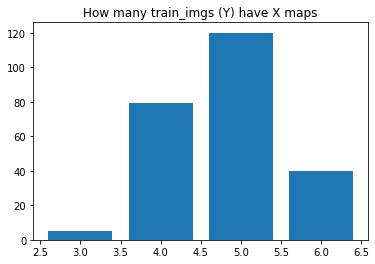

In [ ]:
occurrence_dict = Counter(occs)
plt.bar(occurrence_dict.keys(), occurrence_dict.values())

#formatting
plt.title("How many train_imgs (Y) have X maps")

plt.show()

Therefore:
- All train_imgs have at least 3 maps
- Most of them have 4,5,6 maps

---
# Visualizing the images and the maps

Use the first image six maps for simplicity (s006_c155.png)

In [ ]:
for filename in os.listdir(train_path):
    acc = 0
    for i in range(len(maps_paths)):
        target_filename = get_map_filename(filename, i)
        if os.path.isfile(os.path.join(maps_paths[i], target_filename)):
            acc += 1

    if acc == 6:
        print(filename)
        break

s006_c155.png


# Preprocessing

Since we have six different mask made by different patologists, we combine them through STAPLE (Simultaneous Truth and Performance Level Estimation) technique.

Labels in the masks have the following values:

```0, 1, 3, 4, 5, 6```

Since there are six classes, I'll convert the sixth value to two to make things clearer

```0, 1, 3, 4, 5, 6->2```


In [13]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 14.7 MB/s eta 0:00:00


In [15]:
import multiprocessing
from multiprocessing import Pool
import os

import SimpleITK as sitk

In [32]:
def staple(filename, input_dir, output_dir):
  ''''
  The algorithm iterates throught the various directories in input_dir searching for files named "filename".
  Then it makes an array of the masks and combines them through STAPLE implemented in SimpleITK.
  In case of undecidedLabel, valued 255, the code will take the data from the first mask to resolve the missing information
  '''
  print("processing {}...".format(filename))

  #list of current "filename" mask
  imgs = []

  #for loop to join the various masks named filename
  for p in input_dir:
      if os.path.isfile(os.path.join(p, filename)):
          imgs.append(sitk.ReadImage(os.path.join(p, filename)))

  #apply of the STAPLE algorithm, 255 for undecided labels
  result = sitk.MultiLabelSTAPLE(imgs, 255)

  #as a implementative choice I've decided to fill the undecided Labels with pixel values from the first mask
  p1_data = sitk.GetArrayFromImage(imgs[0])
  result_data = sitk.GetArrayFromImage(result)
  result_data[result_data == 255] = p1_data[result_data == 255]
  
  #changing mask labels from 0, 1, 3, 4, 5, 6 -> 0, 1, 2, 3, 4, 5
  result_data[result_data == 6] = 2

  result = sitk.GetImageFromArray(result_data)
  result.CopyInformation(imgs[0])
  sitk.WriteImage(result, os.path.join(output_dir, filename))

In [ ]:
output_maps = '/content/drive/MyDrive/Staple Maps'


maskfiles = []
for i in maps_paths:
    maskfiles = maskfiles + os.listdir(i)
maskfiles = set(maskfiles)


processes = multiprocessing.cpu_count()

with Pool(processes=processes) as pool:
    results = [pool.apply_async(staple,
                                args=(maskfile, maps_paths,
                                      output_maps))
                for maskfile in maskfiles]
    _ = [_.get() for _ in results]
print("Done")

processing s005_c017.png...processing s002_c033.png...

processing s003_c055.png...
processing s005_c045.png...
processing s005_c033.png...
processing s002_c067.png...
processing s006_c004.png...
processing s001_c109.png...
processing s002_c030.png...
processing s007_c014.png...


# Defining functions for the data loading

In [ ]:
def adjustData(img,mask,flag_multi_class,num_class):
    if(flag_multi_class):
        img = img / 255
        mask = mask[:,:,:,0] if(len(mask.shape) == 4) else mask[:,:,0]
        new_mask = np.zeros(mask.shape + (num_class,))
        for i in range(num_class):
            #for one pixel in the image, find the class in mask and convert it into one-hot vector
            #index = np.where(mask == i)
            #index_mask = (index[0],index[1],index[2],np.zeros(len(index[0]),dtype = np.int64) + i) if (len(mask.shape) == 4) else (index[0],index[1],np.zeros(len(index[0]),dtype = np.int64) + i)
            #new_mask[index_mask] = 1
            new_mask[mask == i,i] = 1
        new_mask = np.reshape(new_mask,(new_mask.shape[0],new_mask.shape[1]*new_mask.shape[2],new_mask.shape[3])) if flag_multi_class else np.reshape(new_mask,(new_mask.shape[0]*new_mask.shape[1],new_mask.shape[2]))
        mask = new_mask
    elif(np.max(img) > 1):
        img = img / 255
        mask = mask /255
        mask[mask > 0.5] = 1
        mask[mask <= 0.5] = 0
    return (img,mask)



def trainGenerator(batch_size,train_path,image_folder,mask_folder,aug_dict,image_color_mode = "grayscale",
                    mask_color_mode = "grayscale",image_save_prefix  = "image",mask_save_prefix  = "mask",
                    flag_multi_class = False,num_class = 2,save_to_dir = None,target_size = (256,256),seed = 1):
    '''
    can generate image and mask at the same time
    use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
    if you want to visualize the results of generator, set save_to_dir = "your path"
    '''
    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)
    image_generator = image_datagen.flow_from_directory(
        train_path,
        classes = [image_folder],
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)
    mask_generator = mask_datagen.flow_from_directory(
        train_path,
        classes = [mask_folder],
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        seed = seed)
    train_generator = zip(image_generator, mask_generator)
    for (img,mask) in train_generator:
        img,mask = adjustData(img,mask,flag_multi_class,num_class)
        yield (img,mask)
